<a href="https://colab.research.google.com/github/fmuranda/Climate_Science./blob/main/Flood_Risk_Assessment_for_Manicaland_Zimbabwe.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Generate a flood risk assessment for Manicaland, Zimbabwe, by downloading the Copernicus DEM (30m) via STAC, calculating slope and flow accumulation locally using libraries like `richdem` or `xarray-spatial`, and computing the Topographic Wetness Index (TWI) to visualize high-risk zones.

# Task
Generate a flood risk assessment for Manicaland, Zimbabwe, by downloading the Copernicus DEM (30m) via STAC, calculating slope and flow accumulation locally using libraries like `richdem` or `xarray-spatial`, and computing the Topographic Wetness Index (TWI) to visualize high-risk zones.

## Download DEM via STAC

### Subtask:
Search and download the Copernicus DEM (30m) for Manicaland, Zimbabwe, using pystac-client.


**Reasoning**:
I will install the necessary libraries for STAC client access and geographic data handling to prepare for downloading the DEM.



In [3]:
!pip install pystac-client planetary-computer pystac requests
import pystac_client
import planetary_computer
import requests
print('Libraries for STAC search and download installed and imported.')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 208.5/208.5 kB 14.3 MB/s eta 0:00:00
Libraries for STAC search and download installed and imported.


**Reasoning**:
I will now use the installed pystac-client to search for the Copernicus DEM (30m) covering the Manicaland region using the specified bounding box.



In [4]:
# Define the bounding box for Manicaland, Zimbabwe
bbox = [32.2, -20.5, 33.3, -17.2]

# Open the STAC catalog
catalog = pystac_client.Client.open(
    "https://planetarycomputer.microsoft.com/api/stac/v1",
    ignore_conformance=True
)

# Search for Copernicus DEM 30m in the bounding box
search = catalog.search(
    collections=["cop-dem-glo-30"],
    bbox=bbox
)

items = list(search.get_items())
print(f'Found {len(items)} items.')

# Group and download the primary data assets
for i, item in enumerate(items):
    signed_item = planetary_computer.sign(item)
    asset_url = signed_item.assets['data'].href
    response = requests.get(asset_url)
    filename = f"dem_{i}.tif"
    with open(filename, 'wb') as f:
        f.write(response.content)
    print(f"Downloaded {filename}")

print('DEM download process completed.')

/usr/local/lib/python3.12/dist-packages/pystac_client/client.py:181: FutureWarning: The `ignore_conformance` option is deprecated and will be removed in the next major release. Instead use `set_conforms_to` or `add_conforms_to` to control behavior.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/pystac_client/item_search.py:925: FutureWarning: get_items() is deprecated, use items() instead
  warnings.warn(


Found 8 items.
Downloaded dem_0.tif
Downloaded dem_1.tif
Downloaded dem_2.tif
Downloaded dem_3.tif
Downloaded dem_4.tif
Downloaded dem_5.tif
Downloaded dem_6.tif
Downloaded dem_7.tif
DEM download process completed.


## Install Raster Libraries

### Subtask:
Install rioxarray and other necessary libraries for raster processing and merging.


**Reasoning**:
I will install rioxarray, rasterio, and matplotlib and import the required modules for raster processing as specified in the instructions.



In [5]:
!pip install rioxarray rasterio matplotlib

import rioxarray
import rasterio
from rioxarray.merge import merge_arrays
import matplotlib.pyplot as plt

print("Raster processing libraries installed and imported.")

Raster processing libraries installed and imported.


**Reasoning**:
The installation and importing of libraries are successful. Now I will load the individual DEM tiles and merge them into a single mosaic using rioxarray, then visualize the result.



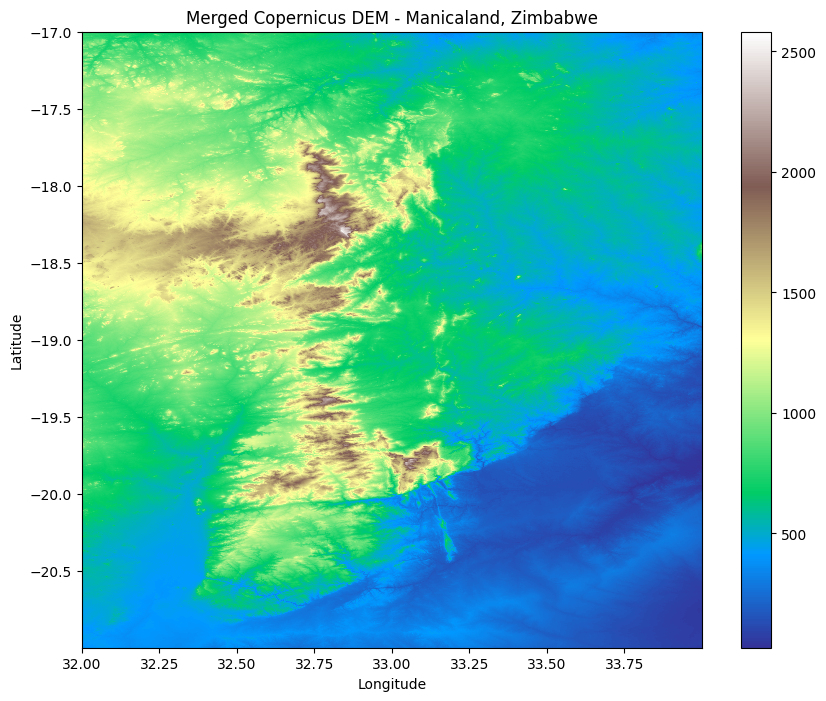

DEM tiles successfully merged and visualized.


In [6]:
# List of downloaded DEM filenames
dem_files = [f"dem_{i}.tif" for i in range(8)]

# Load the tiles using rioxarray
das = [rioxarray.open_rasterio(f) for f in dem_files]

# Merge the tiles into a single DataArray
merged_dem = merge_arrays(das)

# Save the merged result for potential later use
merged_dem.rio.to_raster("merged_dem.tif")

# Visualize the merged DEM
plt.figure(figsize=(10, 8))
merged_dem.plot(cmap="terrain")
plt.title("Merged Copernicus DEM - Manicaland, Zimbabwe")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()

print("DEM tiles successfully merged and visualized.")

# Task
Generate a flood risk assessment for Manicaland, Zimbabwe, by using the merged Copernicus DEM "merged_dem.tif" to calculate slope and flow accumulation locally. Use libraries such as `xarray-spatial` and `datashader` to compute the Topographic Wetness Index (TWI) using the formula ln(Flow Accumulation / tan(Slope)), and visualize the resulting high-risk flood zones.

## Ensure DEM Data Availability

### Subtask:
Verify the existence of 'dem_*.tif' and 'merged_dem.tif' files and reload the merged DEM into memory.


**Reasoning**:
I will check for the existence of the DEM files and load the merged DEM into memory to ensure data availability for subsequent processing.



In [7]:
import os
import rioxarray

# Check for merged DEM and individual tiles
merged_path = 'merged_dem.tif'
if os.path.exists(merged_path):
    print(f'Found {merged_path}.')
else:
    print(f'{merged_path} not found. Checking for tiles...')
    tiles = [f'dem_{i}.tif' for i in range(8)]
    missing_tiles = [t for t in tiles if not os.path.exists(t)]
    if not missing_tiles:
        print('All individual tiles (dem_0 to dem_7) are present.')
    else:
        print(f'Missing tiles: {missing_tiles}')

# Load the merged DEM into memory
merged_dem = rioxarray.open_rasterio(merged_path)

# Print metadata to confirm readiness
print(f'DEM Shape: {merged_dem.shape}')
print(f'DEM CRS: {merged_dem.rio.crs}')
print('DEM successfully reloaded and ready for hydrological processing.')

Found merged_dem.tif.
DEM Shape: (1, 14400, 7200)
DEM CRS: EPSG:4326
DEM successfully reloaded and ready for hydrological processing.


# Task
Generate a flood risk assessment for Manicaland, Zimbabwe, by using the merged Copernicus DEM "merged_dem.tif" to calculate terrain features. Install `xarray-spatial` and `datashader`, then verify the correct module paths to compute the slope (in degrees) and flow accumulation. Use these to calculate the Topographic Wetness Index (TWI) using the formula ln(Flow Accumulation / tan(Slope)), ensuring slope is converted to radians. Finally, visualize the resulting high-risk flood zones.

## Verify xrspatial Functions

### Subtask:
Install the required libraries and inspect the `xrspatial` package to confirm the correct module paths for terrain and hydrological operations.
